In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# transport limited + limiting supply 

In [3]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/'
df = pd.read_csv(path + 'langtang_tl_percentiles_with_coors.csv')
# len(df.columns)
df.columns

Index(['cellnr', 'annual_mean_Qstl_mm', 'annual_25percent_Qstl_mm',
       'annual_50percent_Qstl_mm', 'annual_75percent_Qstl_mm',
       'annual_mean_Qstl_m3', 'annual_25percent_Qstl_m3',
       'annual_50percent_Qstl_m3', 'annual_75percent_Qstl_m3',
       'annual_mean_Qstl_m3_day', 'annual_25percent_Qstl_m3_day',
       'annual_50percent_Qstl_m3_day', 'annual_75percent_Qstl_m3_day',
       'Latitude', 'Longitude', 'z'],
      dtype='object')

In [4]:
ds = df.set_index(['Latitude', 'Longitude']).to_xarray()


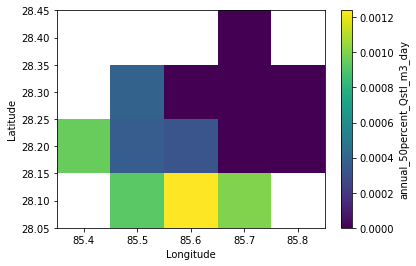

In [5]:
ds.annual_50percent_Qstl_m3_day.plot()


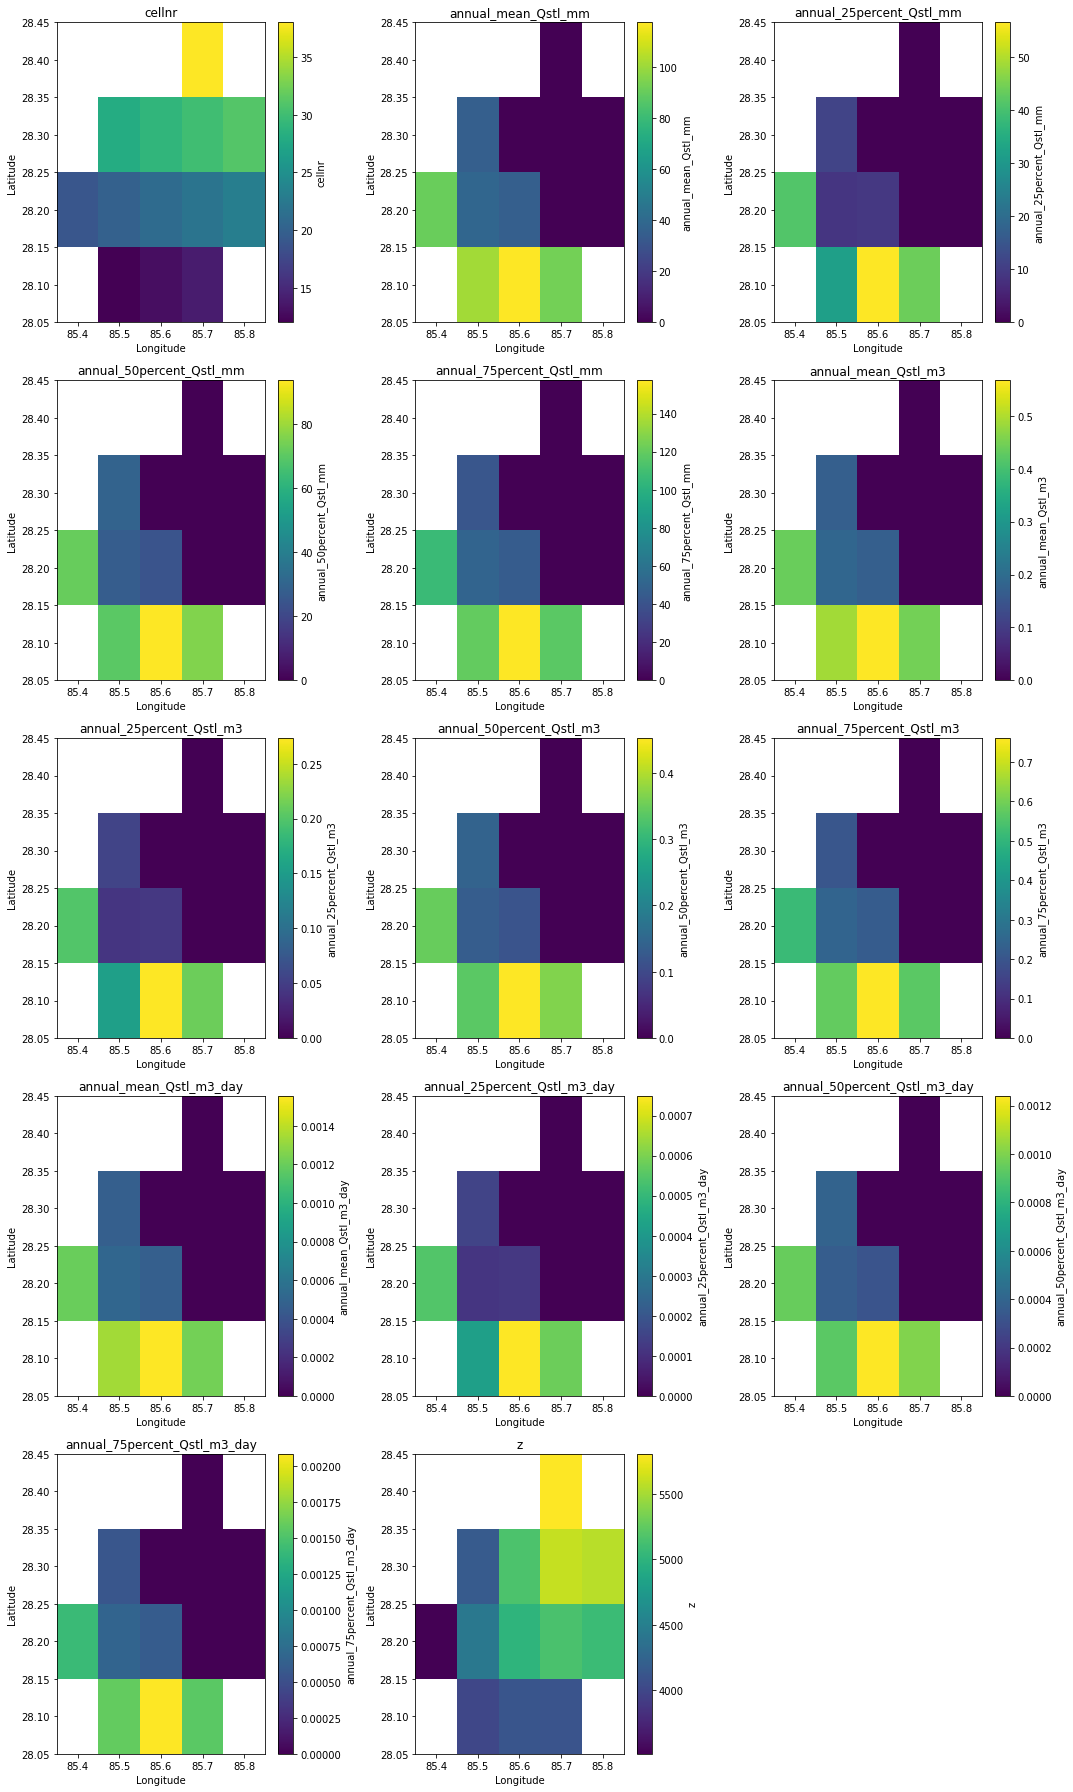

In [6]:
import matplotlib.pyplot as plt
import math

# Assuming ds is a Dataset object from xarray
num_vars = len(ds.data_vars)
cols = 3  # Number of columns for subplots
rows = math.ceil(num_vars / cols)  # Calculate number of rows

fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))  # Adjust figsize as needed

# Flatten the axs array to iterate over subplots properly
axs = axs.flatten()

for i, (var_name, var_data) in enumerate(ds.items()):
    # Plotting on the ith axis
    var_data.plot(ax=axs[i])
    axs[i].set_title(var_name)

# Hide empty subplots
for i in range(num_vars, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


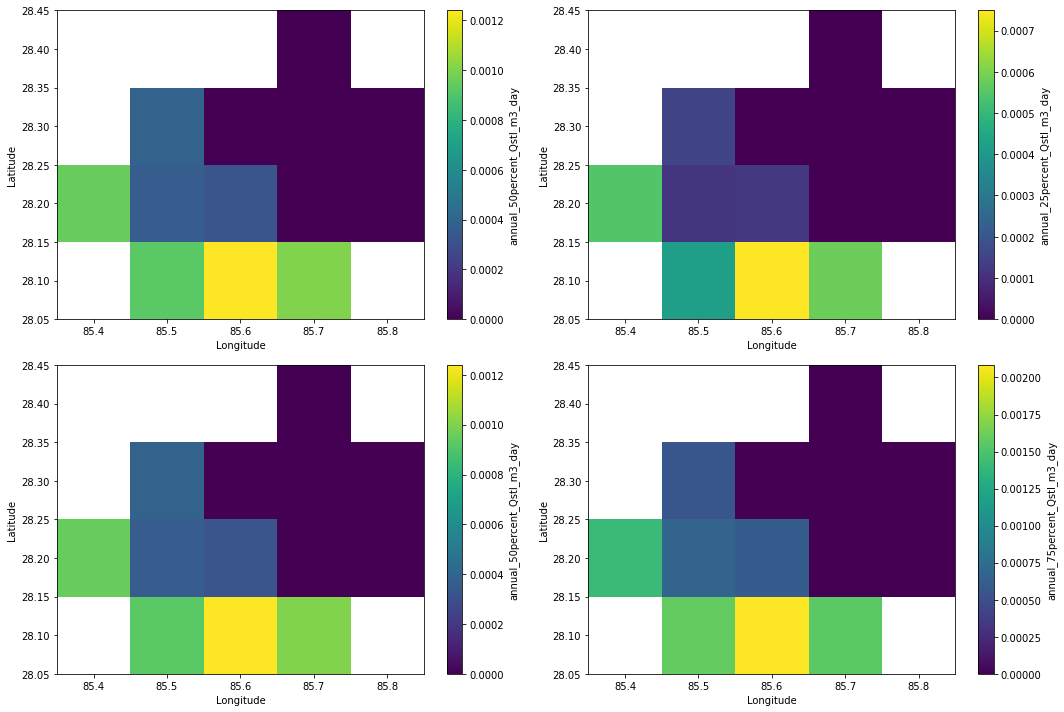

In [10]:
fig = plt.figure(figsize=(15, 10))
mosaic = fig.subplot_mosaic('''
                            ab
                            cd
                            ''')

ds.annual_50percent_Qstl_m3_day.plot(ax=mosaic['a'])
ds.annual_25percent_Qstl_m3_day.plot(ax=mosaic['b'])
ds.annual_50percent_Qstl_m3_day.plot(ax=mosaic['c'])
ds.annual_75percent_Qstl_m3_day.plot(ax=mosaic['d'])

plt.tight_layout()


# supply limited example of one cell 

In [55]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/'

Sed_tl = pd.read_csv(path + 'transport_limited/langtang/cellnr21/Sediment.out')

Sed_mean      = pd.read_csv(path + 'supply_limited/langtang_annual_mean/cellnr12/Sediment.out')
Sed_percent25 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean25percent/cellnr12/Sediment.out')
Sed_percent50 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean50percent/cellnr12/Sediment.out')
Sed_percent75 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean75percent/cellnr12/Sediment.out')


In [56]:
# Sed_percent50.head()

## plot time-series all together

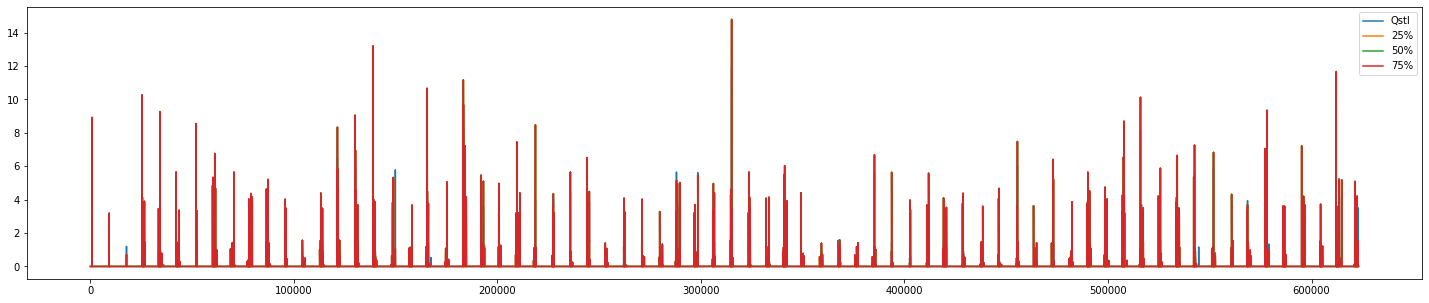

In [58]:
plt.figure(figsize = (25, 5))

Sed_tl.Qstl.plot(label = 'Qstl')

Sed_percent25.Q100.plot(label = '25%')
Sed_percent50.Q100.plot(label = '50%')
Sed_percent75.Q100.plot(label = '75%')

plt.legend()

## plot total annual

In [65]:
def annual_sum_mean(df):
    df['D'] = pd.to_datetime(df['D'])
    df['Year'] = df['D'].dt.year
    annual_sum = df.groupby('Year').sum()
    # annual_mean = annual_sum.Qstl.mean()
    return annual_sum


def annual_sum_mean_percent(df):
    df['D'] = pd.to_datetime(df['D'])
    df['Year'] = df['D'].dt.year
    annual_sum = df.groupby('Year').sum()
    # annual_mean = annual_sum.Q100.mean()
    return annual_sum


Sed_mean_mean_annual      = annual_sum_mean(Sed_mean)
Sed_percent25_mean_annual = annual_sum_mean_percent(Sed_percent25)
Sed_percent50_mean_annual = annual_sum_mean_percent(Sed_percent50)
Sed_percent75_mean_annual = annual_sum_mean_percent(Sed_percent75)



In [66]:
# Sed_mean_mean_annual


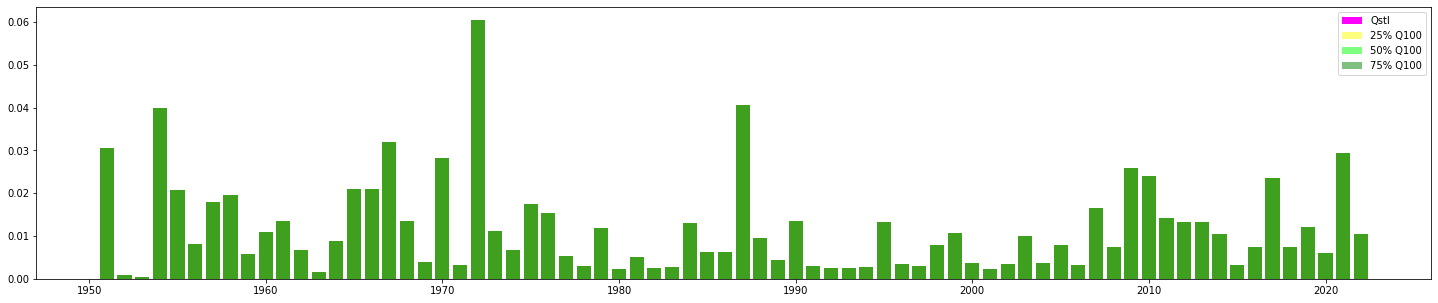

In [67]:
plt.figure(figsize=(25,5))

# transport limited
plt.bar(height = Sed_mean_mean_annual.Qstl, x = Sed_mean_mean_annual.index, color = 'magenta', label = 'Qstl')

# sediment limited
plt.bar(height = Sed_percent25_mean_annual.Q100, x = Sed_percent25_mean_annual.index, color = 'yellow', alpha = 0.5, label = '25% Q100')
plt.bar(height = Sed_percent50_mean_annual.Q100, x = Sed_percent50_mean_annual.index, color = 'lime', alpha = 0.5, label = '50% Q100')
plt.bar(height = Sed_percent75_mean_annual.Q100, x = Sed_percent75_mean_annual.index, color = 'green', alpha = 0.5, label = '75% Q100')

plt.legend()




## plot mean monthly 

In [68]:

def monthly_sum_mean(df):
    df['D'] = pd.to_datetime(df['D'])
    df['Month'] = df['D'].dt.month
    monthly_sum = df.groupby('Month').mean()
    # monthly_mean = monthly_sum.Qstl.mean()
    return monthly_sum

def monthly_sum_mean_percent(df):
    df['D'] = pd.to_datetime(df['D'])
    df['Month'] = df['D'].dt.month
    monthly_sum = df.groupby('Month').mean()
    # monthly_mean = monthly_sum.Q100.mean()
    return monthly_sum


Sed_mean_mean_monthly      = monthly_sum_mean(Sed_mean)
Sed_percent25_mean_monthly = monthly_sum_mean_percent(Sed_percent25)
Sed_percent50_mean_monthly = monthly_sum_mean_percent(Sed_percent50)
Sed_percent75_mean_monthly = monthly_sum_mean_percent(Sed_percent75)



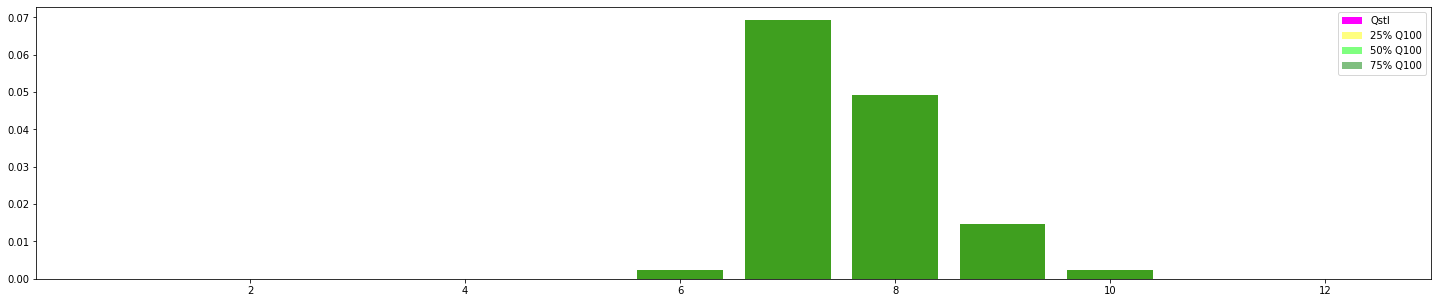

In [69]:
plt.figure(figsize=(25,5))

# transport limited
plt.bar(height = Sed_mean_mean_monthly.Qstl, x = Sed_mean_mean_monthly.index, color = 'magenta', label = 'Qstl')

# sediment limited
plt.bar(height = Sed_percent25_mean_monthly.Q100, x = Sed_percent25_mean_monthly.index, color = 'yellow', alpha = 0.5, label = '25% Q100')
plt.bar(height = Sed_percent50_mean_monthly.Q100, x = Sed_percent50_mean_monthly.index, color = 'lime', alpha = 0.5, label = '50% Q100')
plt.bar(height = Sed_percent75_mean_monthly.Q100, x = Sed_percent75_mean_monthly.index, color = 'green', alpha = 0.5, label = '75% Q100')

plt.legend()


